**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('/content/data_analysis.xlsx - sender.csv')

In [3]:
df1.head()

,sender_id,country,feed type,date
0,1448843,India,award,10/17/2022
1,1448843,United Kingdom,award,10/17/2022
2,1448843,Singapore,award,10/17/2022
3,1440855,India,award,12/22/2022
4,1440855,India,award,12/22/2022


In [4]:
df2 = pd.read_csv('/content/data_analysis.xlsx - receiver.csv')
df2.head()

,company_names,receiver_id,country,points,date,sender_id
0,E,1449672,India,5000,10/17/2022,1448843
1,E,1452428,United Kingdom,18000,10/17/2022,1448843
2,E,1441662,Singapore,40000,10/17/2022,1448843
3,E,1440851,India,15000,12/22/2022,1440855
4,E,1453627,India,15000,12/22/2022,1440855


In [5]:
df3 = pd.read_csv('/content/data_analysis.xlsx - manager.csv')
df3.head()

,manager_id
0,1448843
1,1828504
2,1825603
3,1822534
4,1822550


In [6]:

# concatenate the two dataframes horizontally
data_merge = pd.merge(df1, df2, on=['sender_id', 'country','date'])
data_merge.head()


,sender_id,country,feed type,date,company_names,receiver_id,points
0,1448843,India,award,10/17/2022,E,1449672,5000
1,1448843,United Kingdom,award,10/17/2022,E,1452428,18000
2,1448843,Singapore,award,10/17/2022,E,1441662,40000
3,1440855,India,award,12/22/2022,E,1440851,15000
4,1440855,India,award,12/22/2022,E,1453627,15000


In [7]:
data_merge.shape

(5700961, 7)

In [8]:
df1.shape,df2.shape

((3093, 4), (3093, 6))

In [9]:
# concatenate the two dataframes vertically
data = pd.concat([data_merge, df3], ignore_index=True)


In [10]:
data.head()

,sender_id,country,feed type,date,company_names,receiver_id,points,manager_id
0,1448843.0,India,award,10/17/2022,E,1449672.0,5000.0,NaN
1,1448843.0,United Kingdom,award,10/17/2022,E,1452428.0,18000.0,NaN
2,1448843.0,Singapore,award,10/17/2022,E,1441662.0,40000.0,NaN
3,1440855.0,India,award,12/22/2022,E,1440851.0,15000.0,NaN
4,1440855.0,India,award,12/22/2022,E,1453627.0,15000.0,NaN


In [11]:
data.isnull().sum()

sender_id            105
country              105
feed type            105
date                 105
company_names        105
receiver_id          105
points               105
manager_id       5700961
dtype: int64

In [12]:
data.dtypes

sender_id        float64
country           object
feed type         object
date              object
company_names     object
receiver_id      float64
points           float64
manager_id       float64
dtype: object

<Axes: xlabel='sender_id'>

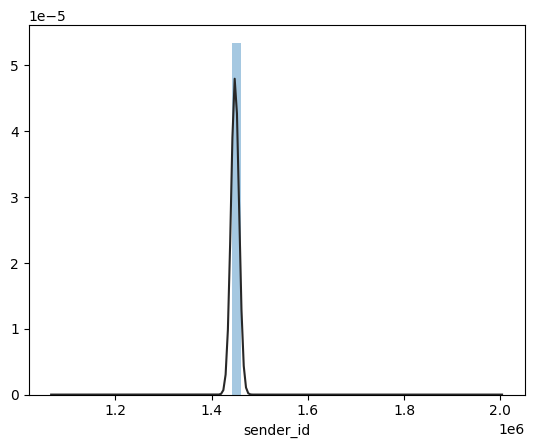

In [13]:
from scipy.stats import norm
sns.distplot(data['sender_id'], kde=False, fit=norm)


<Axes: xlabel='receiver_id'>

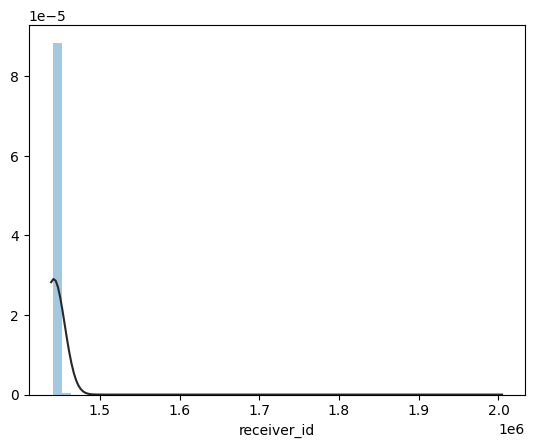

In [14]:
sns.distplot(data['receiver_id'], kde=False, fit=norm)

<Axes: xlabel='points'>

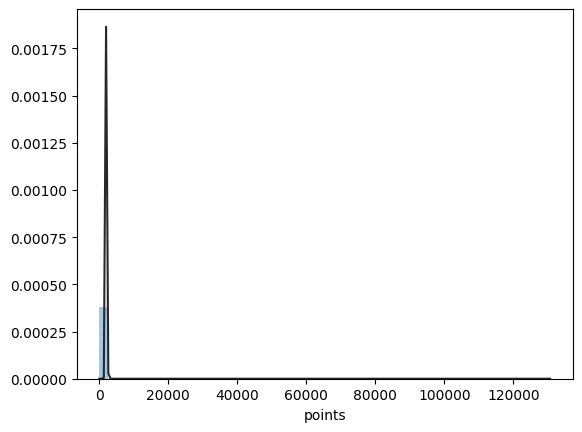

In [15]:
sns.distplot(data['points'], kde=False, fit=norm)

<Axes: xlabel='manager_id'>

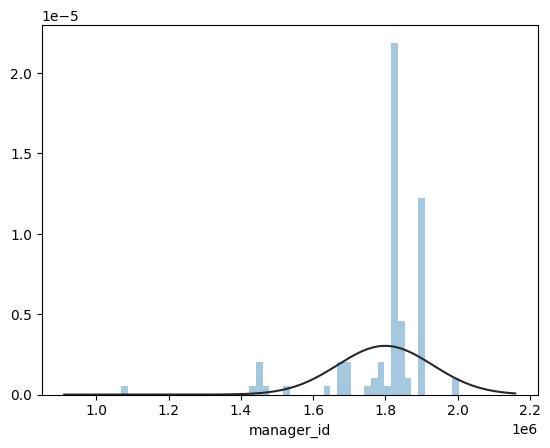

In [16]:
sns.distplot(data['manager_id'], kde=False, fit=norm)

From the above distribution we can see that sender_id follows approximately normal distribution and receiver_id,points,manager_id column follows skewed distribution
**Conclusion**
We will fill the null values in sender_id column by mean and fill the null values in receiver_id,points,manager_idcolumns by median

In [17]:
# fill null values in column sender_id with mean
data['sender_id'].fillna(data['sender_id'].mean(), inplace=True)

# fill null values in column receiver_id with median
data['receiver_id'].fillna(data['receiver_id'].median(), inplace=True)

# fill null values in column points with median
data['points'].fillna(data['points'].median(), inplace=True)

In [18]:
# fill null values in column manager_id with median
data['manager_id'].fillna(data['manager_id'].median(), inplace=True)

In [19]:
data.isnull().sum()

sender_id          0
country          105
feed type        105
date             105
company_names    105
receiver_id        0
points             0
manager_id         0
dtype: int64

In [20]:
## Filling the null values of Object Datatype

# fill null values in column country with mode


mode_country = data['country'].mode()[0]
data['country']=data['country'].fillna(mode_country)

# fill null values in column feed typed with mode
mode_feed = data['feed type'].mode()[0]
data['feed type']=data['feed type'].fillna(mode_feed)

# fill null values in column company_names with mode
mode_company = data['company_names'].mode()[0]
data['company_names']=data['company_names'].fillna(mode_company)

In [21]:
data.isnull().sum()

sender_id          0
country            0
feed type          0
date             105
company_names      0
receiver_id        0
points             0
manager_id         0
dtype: int64

In [22]:
# convert the date column to a datetime datatype
data['date'] = pd.to_datetime(data['date'])

# ex# extract month name from date column
data['month'] = data['date'].dt.strftime('%B')
# access week name from date column
data['week'] = data['date'].dt.strftime('%A')

In [23]:
# fill null values in column month typed with mode
mode_month = data['month'].mode()[0]
data['month']=data['month'].fillna(mode_month)

# fill null values in column weeek with mode
mode_week = data['week'].mode()[0]
data['week']=data['week'].fillna(mode_week)

In [24]:
data.dtypes

sender_id               float64
country                  object
feed type                object
date             datetime64[ns]
company_names            object
receiver_id             float64
points                  float64
manager_id              float64
month                    object
week                     object
dtype: object

In [25]:
data = data.drop('date',axis=1)


In [26]:
data.dtypes

sender_id        float64
country           object
feed type         object
company_names     object
receiver_id      float64
points           float64
manager_id       float64
month             object
week              object
dtype: object

In [27]:
data.isnull().sum()

sender_id        0
country          0
feed type        0
company_names    0
receiver_id      0
points           0
manager_id       0
month            0
week             0
dtype: int64

In [28]:
data.isnull().sum()

sender_id        0
country          0
feed type        0
company_names    0
receiver_id      0
points           0
manager_id       0
month            0
week             0
dtype: int64

In [29]:
data.head()

,sender_id,country,feed type,company_names,receiver_id,points,manager_id,month,week
0,1448843.0,India,award,E,1449672.0,5000.0,1828663.0,October,Monday
1,1448843.0,United Kingdom,award,E,1452428.0,18000.0,1828663.0,October,Monday
2,1448843.0,Singapore,award,E,1441662.0,40000.0,1828663.0,October,Monday
3,1440855.0,India,award,E,1440851.0,15000.0,1828663.0,December,Thursday
4,1440855.0,India,award,E,1453627.0,15000.0,1828663.0,December,Thursday


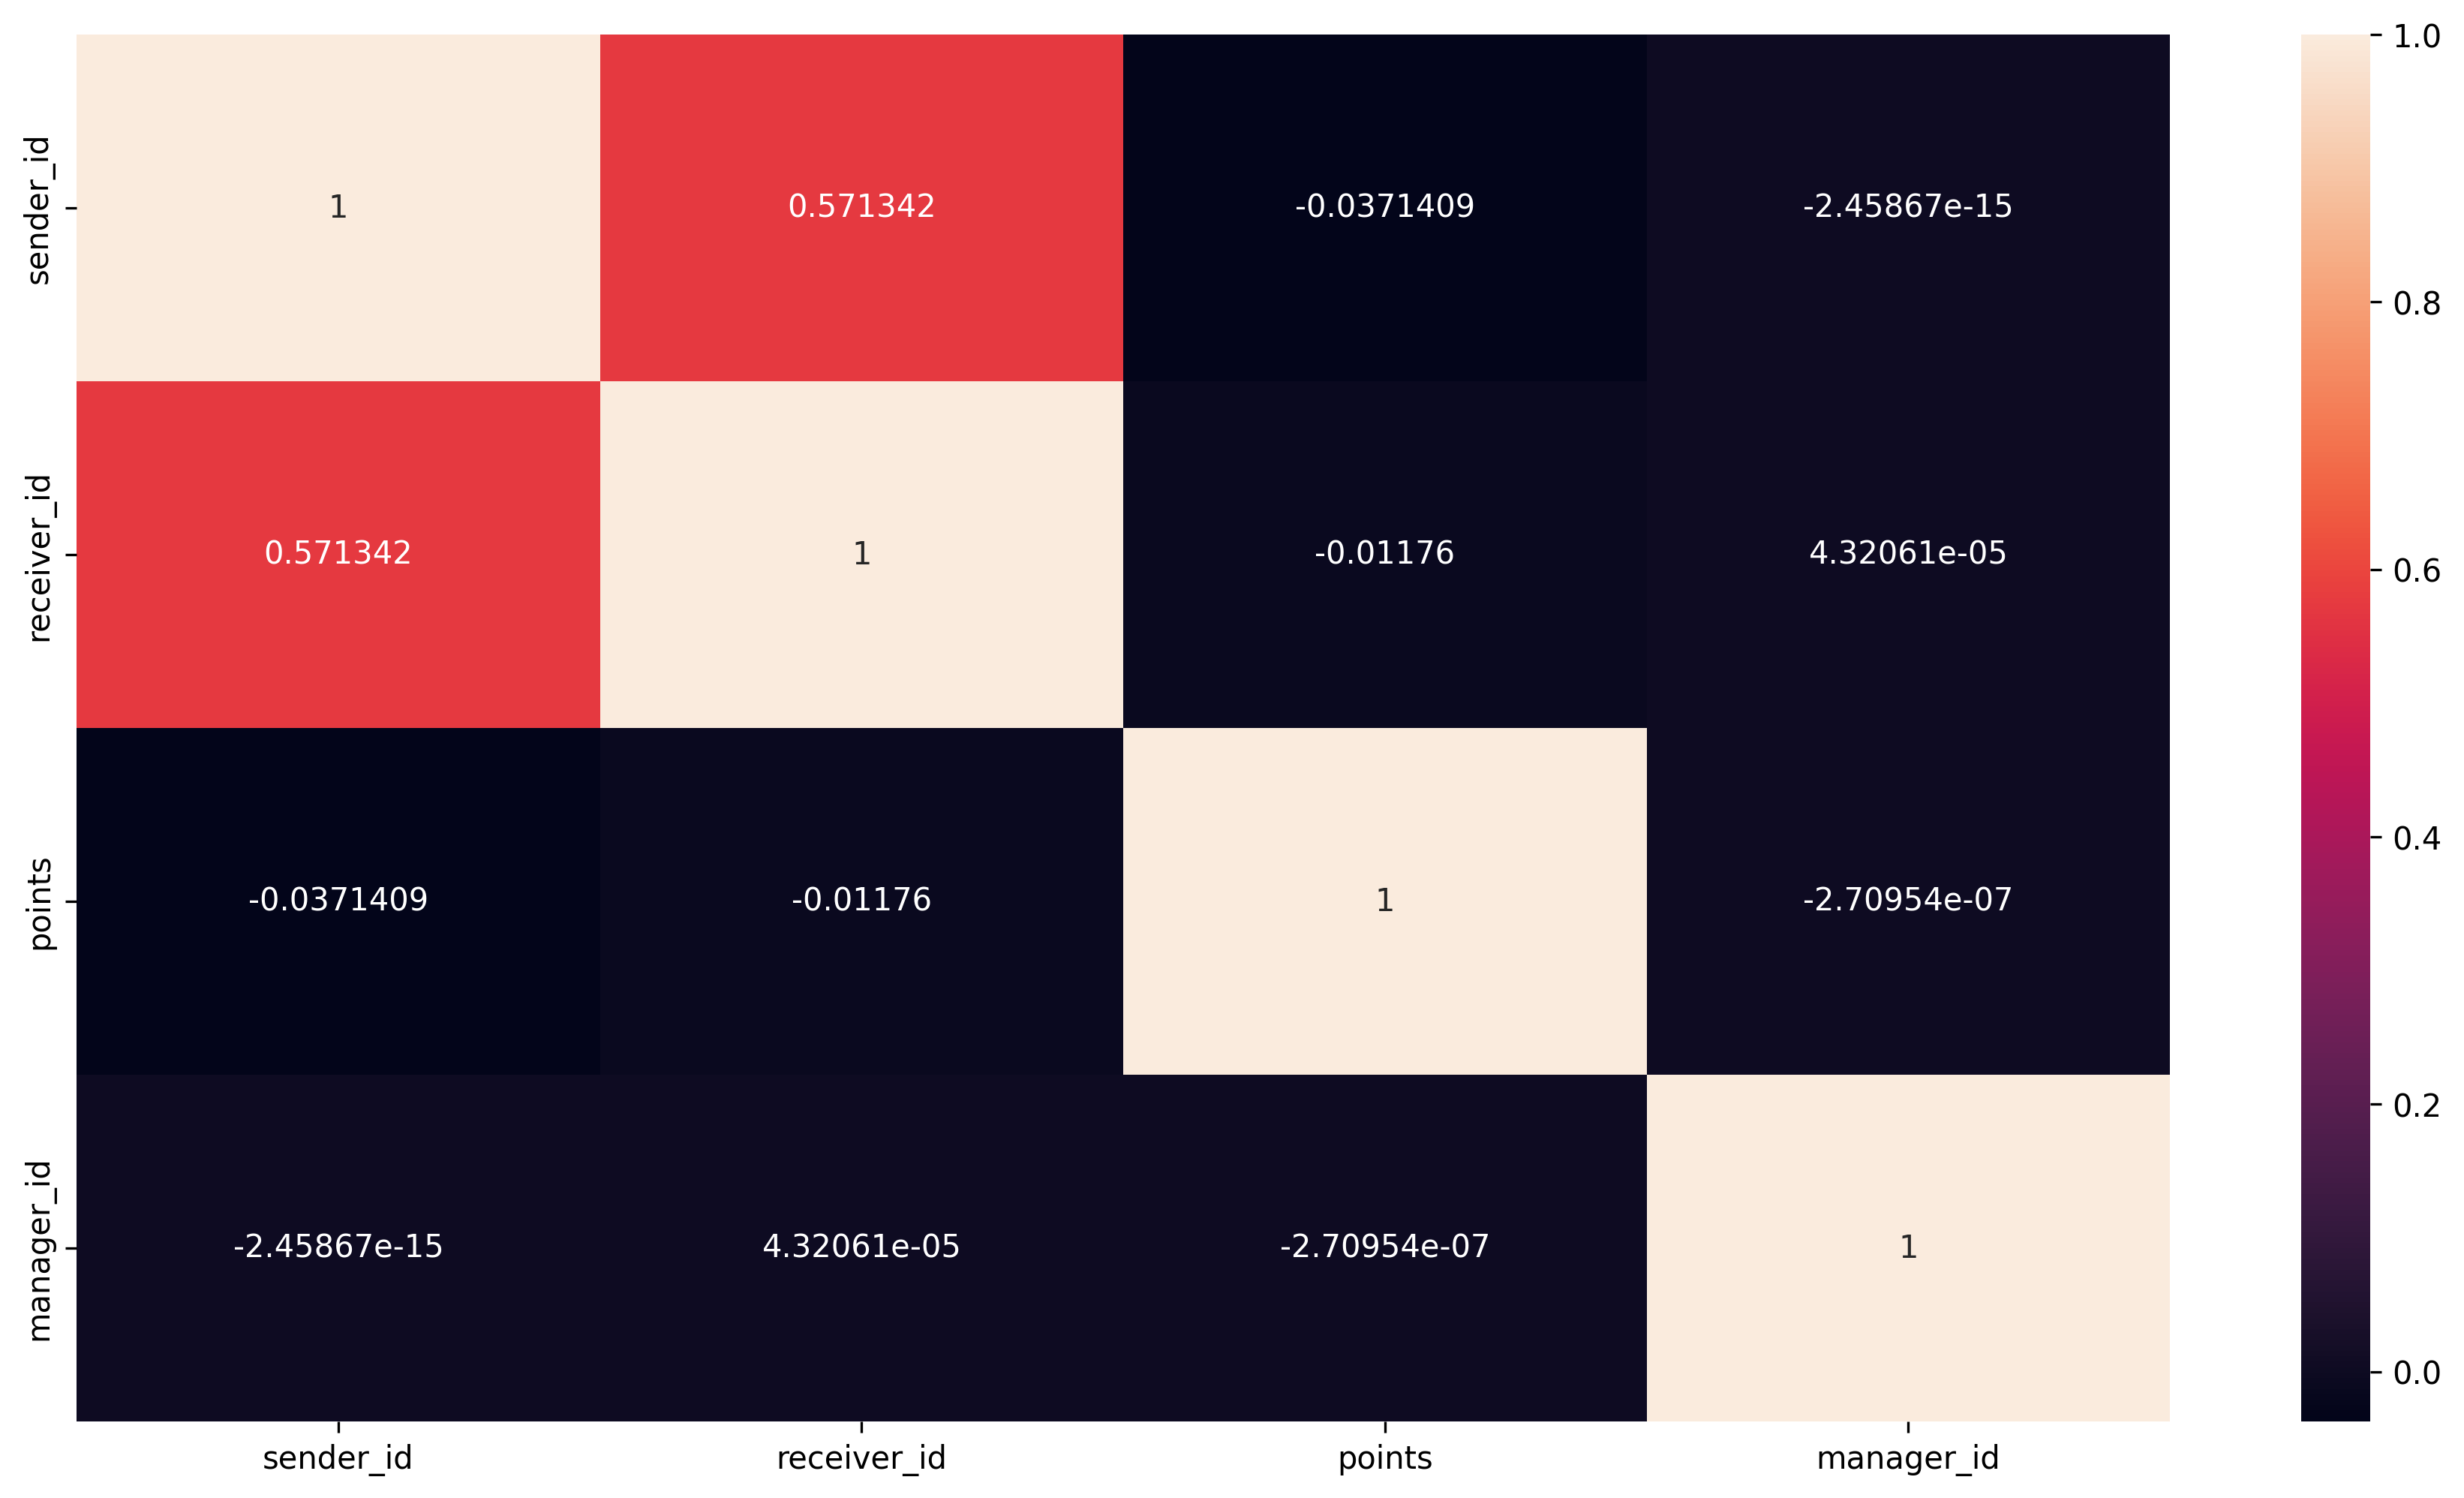

In [30]:
## Correlation heatmap
plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(data.corr(),fmt='g',annot=True);

**Top receivers**

In [51]:
# Group the data by company_name and receiver_id, and sum the points for each receiver
grouped = data.groupby(['company_names', 'receiver_id']).agg({'points': 'sum'}).reset_index()

# Sort the data by points in descending order
top_receivers = grouped.sort_values(by='points', ascending=False).head(10)

top_receivers







,company_names,receiver_id,points
116,E,1440851.0,14538500.0
540,E,1441661.0,14532000.0
577,E,1441737.0,14322000.0
395,E,1441436.0,14322000.0
397,E,1441438.0,14322000.0
398,E,1441439.0,14322000.0
399,E,1441441.0,14322000.0
400,E,1441443.0,14322000.0
401,E,1441444.0,14322000.0
402,E,1441446.0,14322000.0


**Total points received by the users per month**

In [32]:

Total_points=data.groupby(['month'])['points'].mean().reset_index().rename(columns={0:'total_points'})
Total_points

,month,points
0,December,3302.701238
1,November,1669.134021
2,October,1999.905712


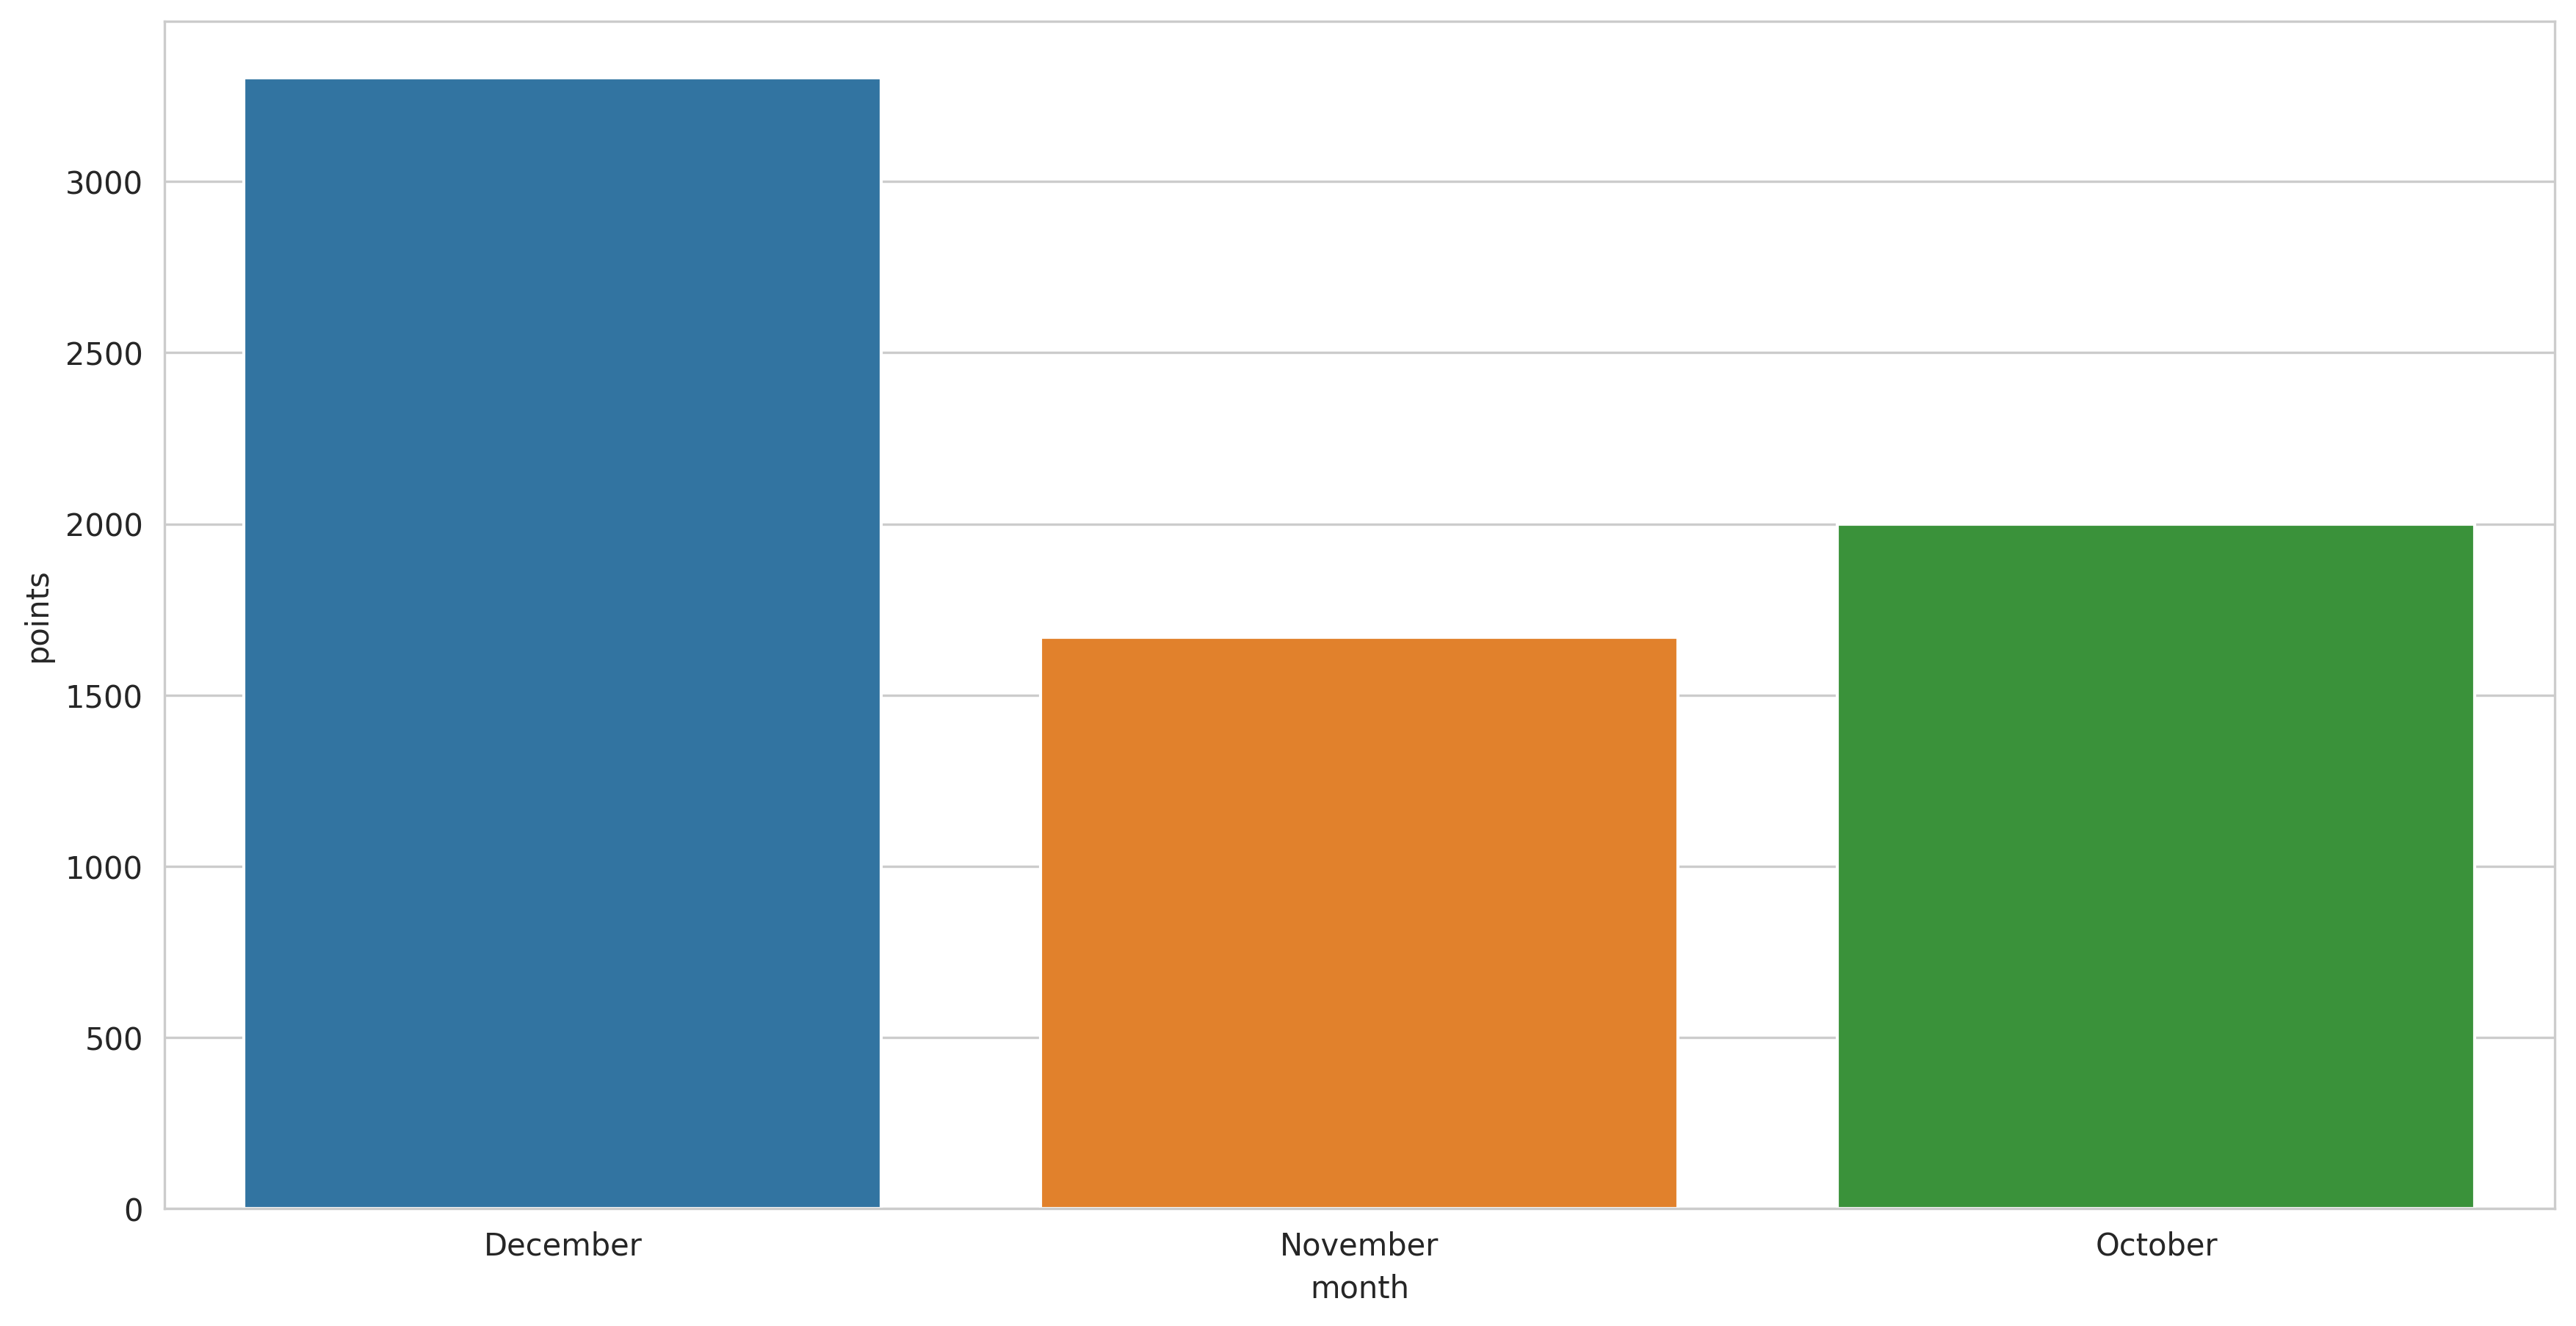

In [33]:

plt.figure(figsize=(14,7),dpi=300)
sns.set_style('whitegrid')
sns.barplot(x="month",y="points",data=Total_points);


**Average points received by the users per week**

In [34]:

# group the data by week and sum the total points received for each week
weekly_points = data.groupby(['week'])['points'].mean().reset_index().rename(columns={0:'weekly_points'})


In [35]:
weekly_points 

,week,points
0,Friday,850.778210
1,Monday,2000.022453
2,Saturday,1953.846154
3,Sunday,1013.888889
4,Thursday,2231.311475
5,Tuesday,1043.720930
6,Wednesday,2640.505689


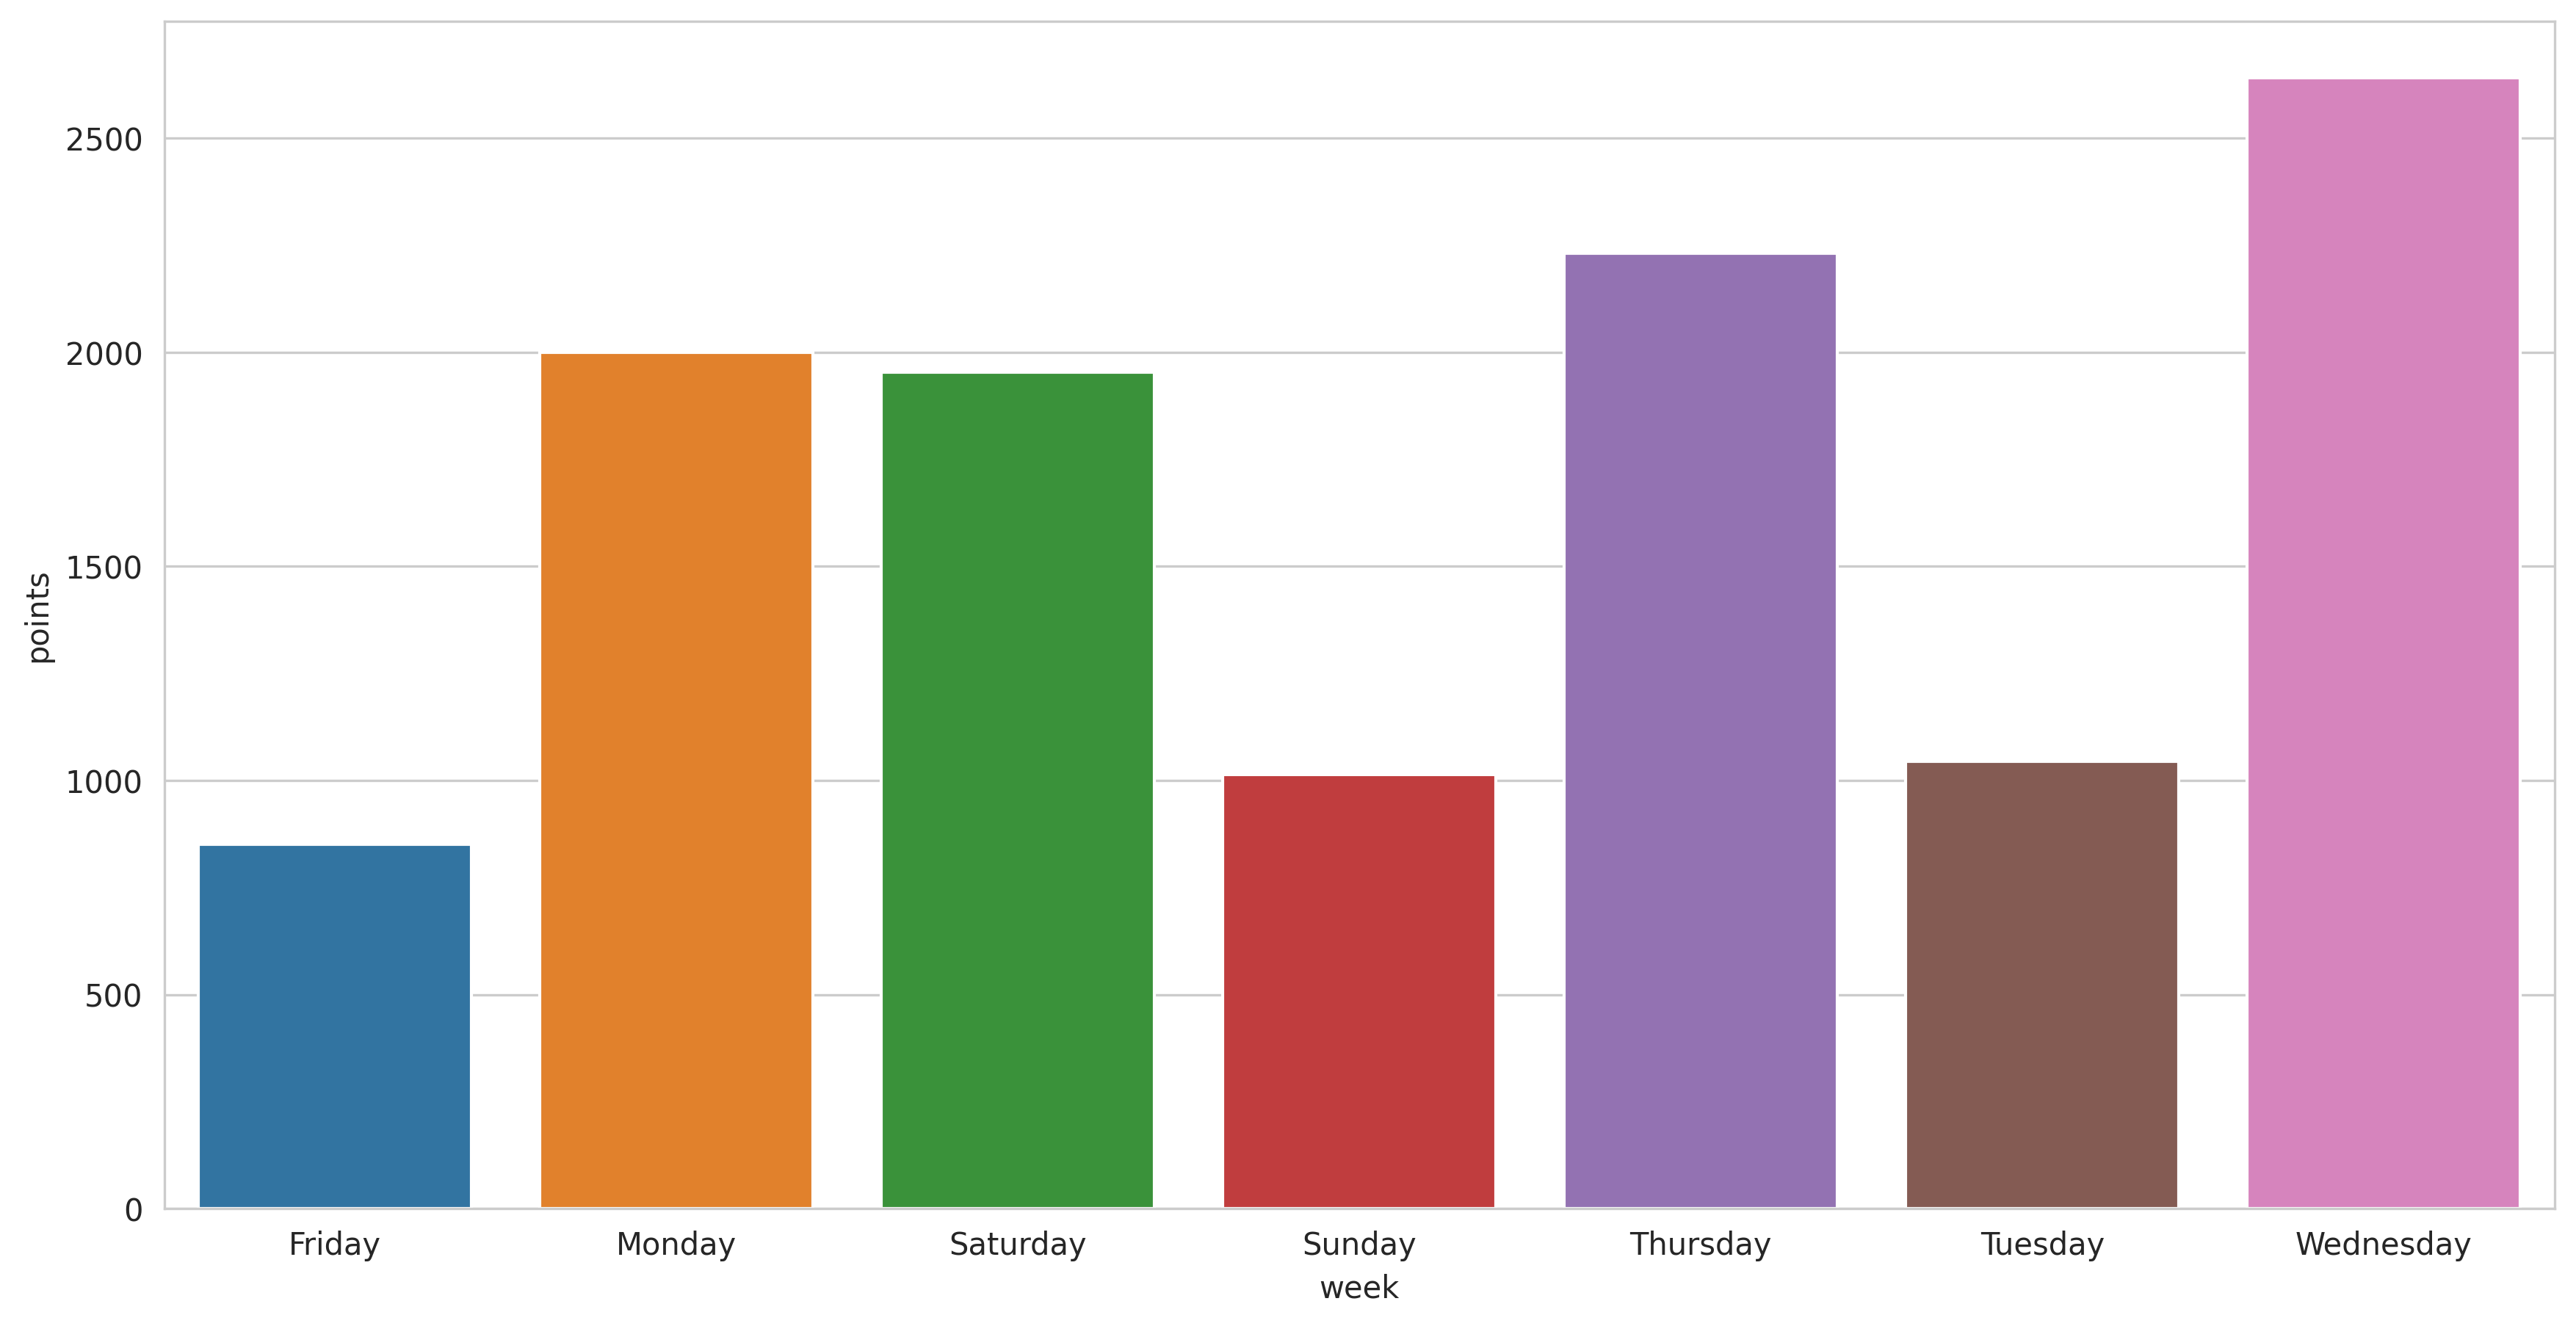

In [36]:
plt.figure(figsize=(14,7),dpi=300)
sns.set_style('whitegrid')
sns.barplot(x="week",y="points",data=weekly_points);

**Top countries on the basis of active users**

In [37]:


# group by country and aggregate active_users
grouped = data.groupby('country')['points'].sum()

# sort in descending order and select top countries
top_countries = grouped.sort_values(ascending=False).head(2)


In [38]:
top_countries

country
India            1.139993e+10
United States    5.772050e+05
Name: points, dtype: float64

**Top awarding managers**

In [39]:

# Group the data by manager_id and compute the sum of awards
manager_awards = data.groupby(['manager_id','feed type'])['points'].sum()

# Sort the results in descending order of awards
manager_awards = manager_awards.sort_values(ascending=False)

# Select the top managers based on the desired criteria
top_managers = manager_awards.head(10)

In [52]:
top_managers

manager_id  feed type
1828663.0   award        1.140124e+10
            badge        2.925500e+05
            wish         5.000000e+04
1834351.0   award        2.000000e+03
1839468.0   award        2.000000e+03
1839389.0   award        2.000000e+03
1839064.0   award        2.000000e+03
1839047.0   award        2.000000e+03
1839014.0   award        2.000000e+03
1838946.0   award        2.000000e+03
Name: points, dtype: float64

** Avg points given by each managers per week**

In [40]:


 # Group the data by manager_id and week and compute the average of points
manager_week_points = data.groupby(['manager_id', 'week'])['points'].mean()

# Reset the index to make the resulting DataFrame easier to work with
manager_week_points = manager_week_points.reset_index()

# Display the resulting DataFrame
print(manager_week_points)



     manager_id    week  points
0     1067672.0  Monday  2000.0
1     1440967.0  Monday  2000.0
2     1448519.0  Monday  2000.0
3     1448843.0  Monday  2000.0
4     1455043.0  Monday  2000.0
..          ...     ...     ...
106   1894131.0  Monday  2000.0
107   1894631.0  Monday  2000.0
108   1894965.0  Monday  2000.0
109   2002683.0  Monday  2000.0
110   2002686.0  Monday  2000.0

[111 rows x 3 columns]


**Monthly analysis of total points given by each manager**

In [53]:


# Group the data by manager_id and month and compute the sum of points
manager_month_points = data.groupby(['manager_id', 'month'])['points'].sum()

# Unstack the data to create a pivot table
pivot_table = manager_month_points.unstack()

pivot_table

month,December,November,October
manager_id,,,
1067672.0,NaN,NaN,2000.0
1440967.0,NaN,NaN,2000.0
1448519.0,NaN,NaN,2000.0
1448843.0,NaN,NaN,2000.0
1455043.0,NaN,NaN,2000.0
...,...,...,...
1894131.0,NaN,NaN,2000.0
1894631.0,NaN,NaN,2000.0
1894965.0,NaN,NaN,2000.0


**Retention analysis of points used per month by each company (cohortanalysis)
**

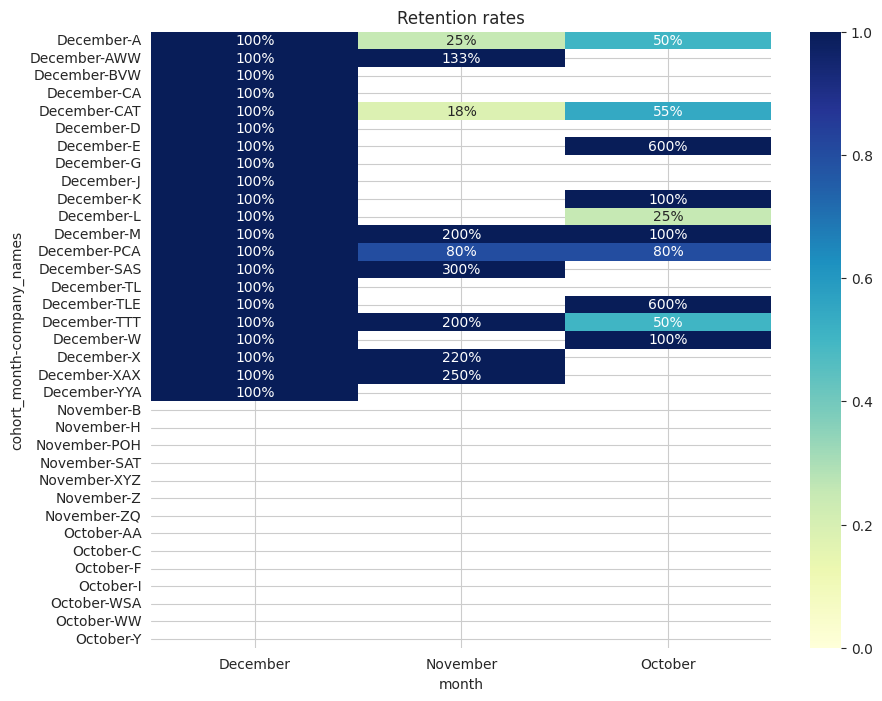

In [56]:


# Define a function to create cohorts based on the first month of usage for each company
def cohort_month(data):
    data['cohort_month'] = data.groupby('company_names')['month'].transform('min')
    return data

# Apply the cohort_month function
data = cohort_month(data)

# Calculate the number of unique customers for each cohort group
cohort_data = data.groupby(['cohort_month', 'month', 'company_names']).agg(n_customers=('sender_id', 'nunique')).reset_index(drop=False)

# Pivot the data to create a matrix
cohort_counts = cohort_data.pivot_table(index=['cohort_month', 'company_names'], columns='month', values='n_customers')

# Extract the size of each cohort
cohort_sizes = cohort_counts.iloc[:,0]

# Calculate retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Create a heatmap to visualize the retention rates
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0.0, vmax=1.0)
plt.show()
